# Certification Project 1
## Data Science & ML Intership
## Travel Aggregator Analysis


In [80]:
# Date: 22-11-2024
# Programmer: Mr A. M.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
booking_data = pd.read_csv("Bookings.csv")
sessions_data = pd.read_csv("Sessions.csv")

booking_data.info()
booking_data.head(10)

sessions_data.info()
sessions_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        339 non-null    object 
 1   booking_id         339 non-null    object 
 2   from_city          339 non-null    object 
 3   from_country       339 non-null    object 
 4   to_city            339 non-null    object 
 5   to_country         339 non-null    object 
 6   booking_time       339 non-null    object 
 7   device_type_used   339 non-null    object 
 8   INR_Amount         339 non-null    float64
 9   service_name       339 non-null    object 
 10  no_of_passengers   339 non-null    float64
 11  days_to_departure  339 non-null    float64
 12  distance_km        339 non-null    float64
dtypes: float64(4), object(9)
memory usage: 34.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 5 columns):
 #   Column     

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN
5,session_322,search_506,2020-01-21T21:10:58.482Z,2020-01-21T21:10:12Z,booking_54
6,session_283,search_880,2020-01-21T05:33:48.061Z,2020-01-21T05:33:33.559Z,booking_106
7,session_194,search_312,2019-09-05T09:04:40.423Z,2019-09-05T09:04:32Z,booking_1
8,session_52,search_1227,2020-01-20T16:54:07.232Z,2020-01-20T16:53:47.477Z,NaN
9,session_52,search_1110,2020-01-20T17:03:52.145Z,2020-01-20T16:53:47.477Z,booking_282


In [11]:
# 1. Find the number of distinct bookings, sessions, and searches
distinct_bookings = booking_data['booking_id'].nunique()
distinct_sessions = sessions_data['session_id'].nunique()
distinct_searches = sessions_data['search_id'].nunique()

# Displaying the distinct counts 
print(f"Distinct Bookings: {distinct_bookings}")
print(f"Distinct Sessions: {distinct_sessions}")
print(f"Distinct Searches: {distinct_searches}")

Distinct Bookings: 339
Distinct Sessions: 331
Distinct Searches: 1360


In [38]:
# 2. Sessions with more than one booking
sessions_with_bookings = sessions_data.dropna(subset=['booking_id'])
#print(sessions_with_bookings)
sessions_with_multiple_bookings = sessions_with_bookings.groupby('session_id')['booking_id'].nunique()
#print(sessions_with_bookings.groupby('session_id').groups)
# .nunique()	Counts distinct values (ensures uniqueness).

sessions_with_multiple_bookings_count = (sessions_with_multiple_bookings > 1).sum()

# Displaying the distinct counts and session analysis results
print(f"Sessions with More than One Booking: {sessions_with_multiple_bookings_count}")
print(sessions_with_multiple_bookings[sessions_with_multiple_bookings > 1])

Sessions with More than One Booking: 10
session_id
session_134    2
session_154    2
session_196    2
session_231    2
session_27     2
session_290    2
session_298    2
session_324    2
session_50     2
session_76     2
Name: booking_id, dtype: int64


               booking_time day_of_week
0 2020-02-05 16:12:08+00:00   Wednesday
1 2018-11-21 08:21:47+00:00   Wednesday
2 2019-12-16 22:54:58+00:00      Monday
3 2021-10-29 12:25:38+00:00      Friday
4 2020-08-11 16:09:10+00:00     Tuesday
day_of_week
Thursday     65
Tuesday      59
Monday       51
Friday       51
Saturday     44
Sunday       35
Wednesday    34
Name: count, dtype: int64


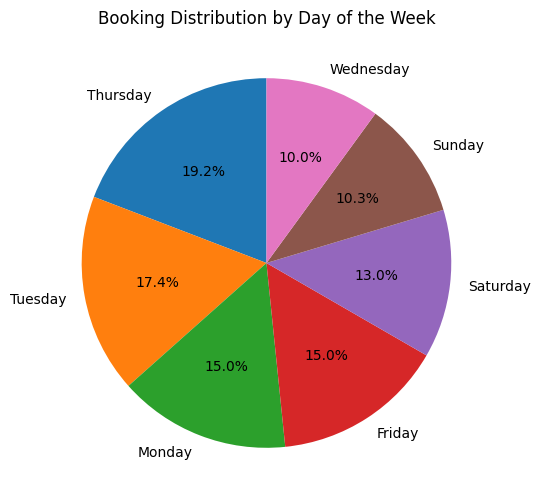

In [46]:
# 3. Days of the week with the highest bookings
booking_data['booking_time'] = pd.to_datetime(booking_data['booking_time'])
booking_data['day_of_week'] = booking_data['booking_time'].dt.day_name()
print(booking_data[['booking_time' , 'day_of_week']].head())
bookings_per_day = booking_data['day_of_week'].value_counts()
print(bookings_per_day)

# Plot a pie chart for the distribution
plt.figure(figsize=(8, 6))
bookings_per_day.plot.pie(autopct='%1.1f%%', startangle=90, ylabel='', title='Booking Distribution by Day of the Week')
plt.show()

In [56]:
# 4. Total number of bookings and total Gross Booking Value in INR per service name
print(booking_data['service_name'].unique())

print(booking_data.groupby('service_name').groups) # All rows with the same service_name are grouped together.
#Keys are the unique values in service_name (the groups).
#Values are lists of row indices in the DataFrame that belong to each group.


service_bookings = booking_data.groupby('service_name').agg(
    total_bookings=('booking_id', 'count'), # Counts the number of non-null entries in the booking_id column. total number of bookings for each service.
    total_gross_value=('INR_Amount', 'sum') # Sums up all the values in the INR_Amount column. total gross booking value for each service.
).reset_index()  # Adding .reset_index() makes service_name a regular column, making the data easier to work with.

# Displaying the Service Booking Summary
print(service_bookings)

['MMT' 'YATRA' 'GOIBIBO']
{'GOIBIBO': [3, 4, 5, 6, 7, 11, 13, 14, 18, 21, 24, 25, 28, 29, 32, 34, 35, 36, 38, 43, 44, 45, 46, 47, 48, 49, 50, 51, 59, 60, 61, 63, 65, 66, 68, 69, 70, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 111, 113, 114, 115, 119, 120, 121, 122, 123, 124, 125, 128, 129, 130, 132, 133, 137, 138, 139, 140, 141, 145, 146, 147, 152, 153, 154, 155, 158, 162, 163, 165, 166, 167, 169, 172, 173, ...], 'MMT': [0, 8, 16, 17, 54, 55, 56, 57, 71, 72, 73, 74, 82, 94, 116, 126, 142, 150, 160, 161, 174, 182, 183, 190, 199, 200, 212, 218, 219, 230, 231, 235, 261, 269, 282, 287, 288, 289, 290, 300, 301, 302, 303, 314, 323, 331, 332, 333], 'YATRA': [1, 2, 9, 10, 12, 15, 19, 20, 22, 23, 26, 27, 30, 31, 33, 37, 39, 40, 41, 42, 52, 53, 58, 62, 64, 67, 75, 76, 95, 96, 99, 108, 109, 110, 112, 117, 118, 127, 131, 134, 135, 136, 143, 144, 148, 149, 151, 156, 157, 159, 164, 168, 170, 171, 175, 176, 185, 187, 188, 191, 195, 1

In [72]:
# 5. Most booked route for customers with more than 1 booking

# Step 1: Group by customer_id
# This groups the data by unique customer IDs and organizes rows belonging to each customer.
group_by_customer_id = booking_data.groupby('customer_id')
print("# Step 1: Grouping the data by customer_id")
print(group_by_customer_id.groups)  # View the grouped indices for each customer
print("-" * 50)

# Step 2: Count unique booking_id values for each customer
# For each customer, we calculate the number of unique booking IDs to find out how many bookings they made.
customer_booking_counts = booking_data.groupby('customer_id')['booking_id'].nunique()
print("# Step 2: Count unique booking IDs for each customer")
print(customer_booking_counts.head())  # Display the first few results
print("-" * 50)

# Step 3: Create a boolean series for customers with more than 1 booking
# This creates a filter to identify customers who made more than one booking.
customers_with_more_than_one_booking = customer_booking_counts > 1
print("# Step 3: Boolean filter for customers with more than 1 booking")
print(customers_with_more_than_one_booking)  # View the boolean values
print("-" * 50)

# Step 4: Filter the customer IDs with more than one booking
# We extract the indices (customer IDs) where the filter is True.
customers_with_multiple_bookings = customer_booking_counts[customers_with_more_than_one_booking].index
print("# Step 4: Extract customer IDs with more than one booking")
print(customers_with_multiple_bookings)  # Display the filtered customer IDs
print("-" * 50)

# Step 5: Filter the original data for these customers
# Use the filtered customer IDs to subset the original data.
multiple_bookings_data = booking_data[booking_data['customer_id'].isin(customers_with_multiple_bookings)]
print("# Step 5: Filtered data for customers with more than one booking")
print(multiple_bookings_data.head())  # Display the first few rows of the filtered data
print("-" * 50)

# Step 6: Group by route (from_city to to_city) and count occurrences
# Count the frequency of each route (combination of from_city and to_city) for customers with multiple bookings.
route_counts = multiple_bookings_data.groupby(['from_city', 'to_city']).size() # Number of rows in each group 
print("# Step 6: Count the frequency of each route")
print(route_counts.head())  # Display the first few route counts
print("-" * 50)

# Step 7: Identify the most booked route
# Find the route with the highest count.
most_booked_route = route_counts.idxmax()  # This returns the route (from_city, to_city) with the maximum count
most_booked_route_count = route_counts.max()  # This returns the count of that route
print("# Step 7: Most booked route for customers with more than one booking")
print(f"The most booked route is {most_booked_route} with {most_booked_route_count} bookings.")
print("-" * 50)

# Step 8: Sort the route counts in descending order
sorted_routes = route_counts.sort_values(ascending=False)

# Step 9: Extract the top 5 destinations
top_5_routes = sorted_routes.head(5)

# Step 10: Print the results
print("# Step 8: Top 5 destinations for customers with more than one booking")
print(top_5_routes)


# Step 1: Grouping the data by customer_id
{'customer_0': [155], 'customer_1': [195], 'customer_10': [252], 'customer_100': [138], 'customer_101': [84], 'customer_102': [247], 'customer_103': [212], 'customer_104': [144], 'customer_105': [232], 'customer_106': [327], 'customer_107': [302], 'customer_108': [324], 'customer_109': [47], 'customer_11': [107], 'customer_110': [221], 'customer_111': [10], 'customer_112': [103], 'customer_113': [179], 'customer_114': [20], 'customer_115': [141], 'customer_116': [79], 'customer_117': [71], 'customer_118': [112], 'customer_119': [56], 'customer_12': [197], 'customer_120': [190, 191], 'customer_121': [99], 'customer_122': [95], 'customer_123': [210], 'customer_124': [124], 'customer_125': [219], 'customer_126': [311], 'customer_127': [234], 'customer_128': [49], 'customer_129': [77], 'customer_13': [204], 'customer_130': [117], 'customer_131': [61], 'customer_132': [58], 'customer_133': [334], 'customer_134': [265], 'customer_135': [180], 'custo

In [79]:

# 6. Top 3 departure cities for advance bookings (min 5 departures)

# Step 1: Group by 'from_city'
# Group the data by 'from_city' to calculate statistics for each departure city.
group_by_city = booking_data.groupby('from_city')

# Step 2: Calculate Aggregations
# For each city, calculate:
# 1. Average days to departure ('days_to_departure', 'mean') -> Indicates how far in advance bookings are made.
# 2. Total number of departures ('from_city', 'size') -> Total bookings departing from each city.
booking_advance = group_by_city.agg(
    avg_days_to_departure=('days_to_departure', 'mean'),
    total_departures=('from_city', 'size')
)
print("# Step 2: Aggregated data for each city")
print(booking_advance.head())  # Display the first few rows of the aggregated data
print("-" * 50)

# Step 3: Filter Cities with At Least 5 Departures
# Retain only the cities with 5 or more departures to ensure the analysis is meaningful.
eligible_cities = booking_advance[booking_advance['total_departures'] >= 5]
print("# Step 3: Cities with at least 5 departures")
print(eligible_cities.head())  # Display the first few rows of the filtered data
print("-" * 50)

# Step 4: Identify Top 3 Cities with Highest Average Days to Departure
# Sort cities by 'avg_days_to_departure' in descending order and select the top 3.
top_3_advance_cities = eligible_cities.nlargest(3, 'avg_days_to_departure')
print("# Step 4: Top 3 Departure Cities for Advance Bookings")
print(top_3_advance_cities)  # Display the top 3 cities



# Step 2: Aggregated data for each city
           avg_days_to_departure  total_departures
from_city                                         
Agartala                    1.00                 1
Ahmedabad                  11.75                 8
Angamāli                   29.50                 2
Bangalore                  37.50                 2
Barelā                      3.00                 1
--------------------------------------------------
# Step 3: Cities with at least 5 departures
            avg_days_to_departure  total_departures
from_city                                          
Ahmedabad               11.750000                 8
Bālāpur                 46.166667                 6
Chennai                 26.187500                16
Delhi                   12.758621                29
Devanhalli              29.583333                24
--------------------------------------------------
# Step 4: Top 3 Departure Cities for Advance Bookings
            avg_days_to_departure  tota

# Step 1: Numerical columns selected for correlation analysis
Index(['INR_Amount', 'no_of_passengers', 'days_to_departure', 'distance_km'], dtype='object')
--------------------------------------------------
# Step 2: Correlation matrix of numerical columns
                   INR_Amount  no_of_passengers  days_to_departure  \
INR_Amount           1.000000          0.397229           0.284534   
no_of_passengers     0.397229          1.000000           0.187128   
days_to_departure    0.284534          0.187128           1.000000   
distance_km          0.623565          0.001698           0.216972   

                   distance_km  
INR_Amount            0.623565  
no_of_passengers      0.001698  
days_to_departure     0.216972  
distance_km           1.000000  
--------------------------------------------------


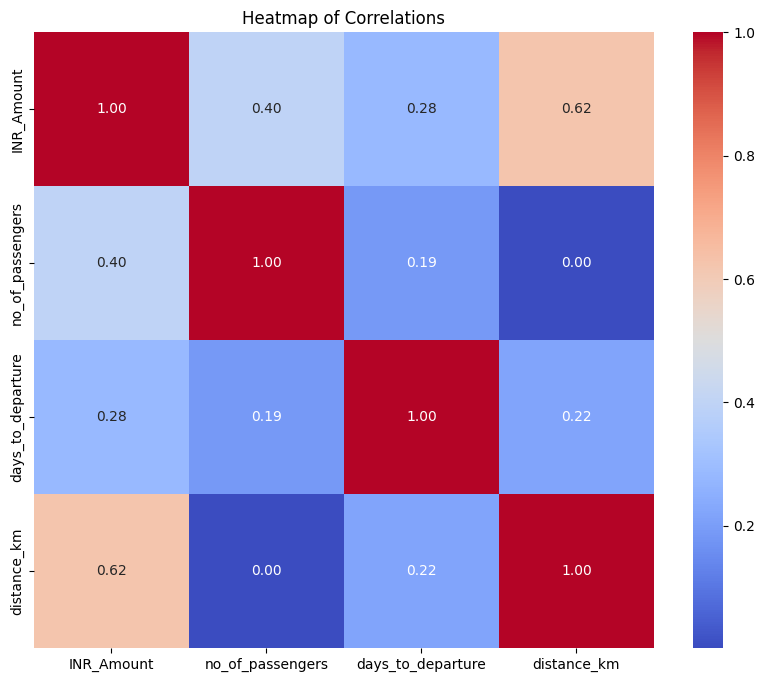

# Step 4: Most correlated pair of numerical columns
The most correlated pair is ('INR_Amount', 'distance_km') with a correlation value of 0.62
The correlation analysis indicates that the longer the distance traveled, the higher the price of the booking tends to be, with a correlation of 0.62.


In [84]:

# 7. Heatmap for correlations and most correlated pair
import seaborn as sns

# Step 1: Select Numerical Columns
# Use pandas to filter the columns with numerical data types from the booking_data DataFrame.
numerical_columns = booking_data.select_dtypes(include='number')

print("# Step 1: Numerical columns selected for correlation analysis")
print(numerical_columns.columns)  # Display the numerical columns being analyzed
print("-" * 50)

# Step 2: Compute the Correlation Matrix
# Calculate the correlation matrix for the numerical columns. This shows how strongly each pair of columns is related.
correlation_matrix = numerical_columns.corr()

print("# Step 2: Correlation matrix of numerical columns")
print(correlation_matrix)  # Display the correlation matrix
print("-" * 50)

# Step 3: Plot the Correlation Heatmap
# Visualize the correlation matrix using a heatmap. Correlation values closer to 1 or -1 indicate stronger relationships.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap of Correlations")
plt.show()

# Step 4: Identify the Most Correlated Pair
# Flatten the correlation matrix, sort it, and find the most correlated pair (ignoring self-correlations).
correlation_flat = correlation_matrix.abs().unstack()  # Flatten the matrix and take absolute values
sorted_correlation = correlation_flat.sort_values(ascending=False)  # Sort values in descending order

# Ignore self-correlation (diagonal values = 1)
most_correlated_pair = sorted_correlation[sorted_correlation < 1].idxmax()  # Get the pair with the highest correlation
most_correlation_value = sorted_correlation[sorted_correlation < 1].max()  # Get the corresponding correlation value

# Step 5: Display the Most Correlated Pair
print("# Step 4: Most correlated pair of numerical columns")
print(f"The most correlated pair is {most_correlated_pair} with a correlation value of {most_correlation_value:.2f}")
print(f"The correlation analysis indicates that the longer the distance traveled, the higher the price of the booking tends to be, with a correlation of {most_correlation_value:.2f}.")


In [92]:

# 8. Most used device type for each service

# Step 1: Group by 'service_name' and 'device_type_used'
# Count the number of bookings for each combination of service and device type.
device_usage_by_service = booking_data.groupby(['service_name', 'device_type_used']).size()

print("# Step 1: Count of device usage for each service")
print(device_usage_by_service)  # Display the counts for each combination
print("-" * 50)

# Step 2: Find the Most Used Device Type for Each Service
# Group the results by 'service_name' and identify the device type with the highest count for each service.
# Find the index of the most used device type for each service
most_used_device_indices = device_usage_by_service.groupby(level=0).idxmax()
print(most_used_device_indices)
# Output: ('GOIBIBO', 'Desktop'), ('MMT', 'Android'), ('YATRA', 'Desktop')

# Extract only the device type (second element of the tuple)
most_used_device_by_service = most_used_device_indices.map(lambda x: x[1])
print(most_used_device_by_service)
# Output: GOIBIBO -> Desktop, MMT -> Android, YATRA -> Desktop
print("-" * 50)

print("# Step 2: Most used device type for each service")
print(most_used_device_by_service)  # Display the most used device type for each service
print("-" * 50)

# Step 3: Generate a Summary Sentence for Each Service
# Iterate over the results and create a human-readable explanation.
print("# Step 3: Explanation for each service")
for service, device in most_used_device_by_service.items():
    print(f"For {service}, the most used device type is {device}.")



# Step 1: Count of device usage for each service
service_name  device_type_used
GOIBIBO       Android             44
              Desktop             61
              IOS                 70
              MobileWeb           11
MMT           Android              8
              Desktop             30
              IOS                  5
              MobileWeb            5
YATRA         Android             18
              Desktop             51
              IOS                 22
              MobileWeb           11
              Tablet               3
dtype: int64
--------------------------------------------------
service_name
GOIBIBO      (GOIBIBO, IOS)
MMT          (MMT, Desktop)
YATRA      (YATRA, Desktop)
dtype: object
<class 'pandas.core.series.Series'>
service_name
GOIBIBO        IOS
MMT        Desktop
YATRA      Desktop
dtype: object
--------------------------------------------------
# Step 2: Most used device type for each service
service_name
GOIBIBO        IOS
MMT        D

# Step 1: Add a 'quarter' column based on 'booking_time'
    customer_id   booking_id   from_city from_country            to_city  \
0  customer_259   booking_82     Gurgaon        India          Ahmedabad   
1  customer_303  booking_156       Delhi        India           Brussels   
2  customer_203   booking_99  Devanhalli        India  Frankfurt am Main   
3  customer_211  booking_319     Gurgaon        India  Frankfurt am Main   
4  customer_287  booking_222     Gurgaon        India   Roissy-en-France   

  to_country              booking_time device_type_used  INR_Amount  \
0      India 2020-02-05 16:12:08+00:00          Desktop     2565.28   
1    Belgium 2018-11-21 08:21:47+00:00          Android    23120.00   
2    Germany 2019-12-16 22:54:58+00:00          Android    25717.60   
3    Germany 2021-10-29 12:25:38+00:00          Desktop   135969.60   
4     France 2020-08-11 16:09:10+00:00          Android    31791.20   

  service_name  no_of_passengers  days_to_departure  distan

C:\Users\akram\AppData\Local\Temp\ipykernel_13904\3811917305.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  booking_data['quarter'] = booking_data['booking_time'].dt.to_period('Q')


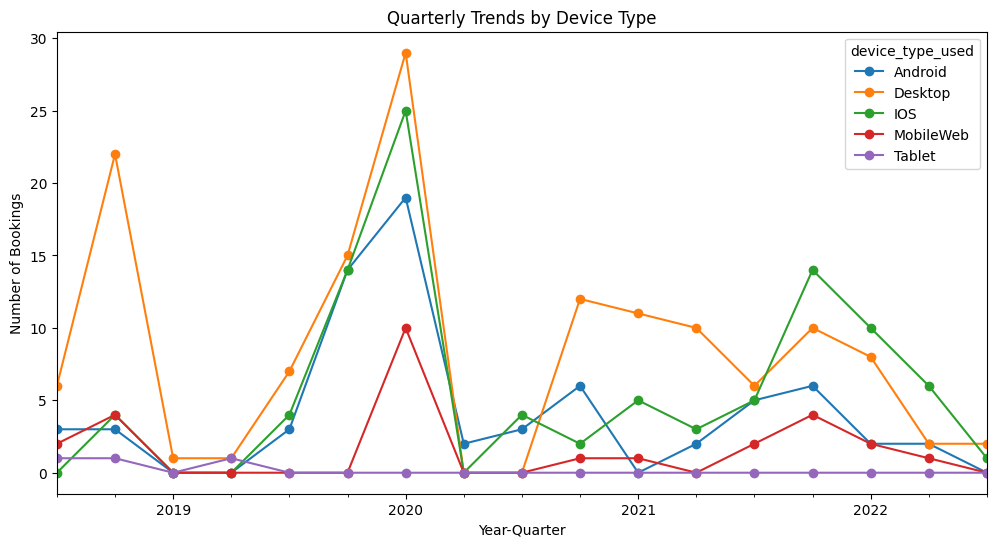

In [98]:

# 9. Quarterly trends for bookings by device type

# Step 1: Convert 'booking_time' to Quarterly Period
# Extract the quarter (Year-Quarter) from the 'booking_time' column.
# The 'dt.to_period("Q")' method converts timestamps to quarterly periods.
booking_data['quarter'] = booking_data['booking_time'].dt.to_period('Q')

print("# Step 1: Add a 'quarter' column based on 'booking_time'")
#print(booking_data[['booking_time', 'quarter']].head())  # Display the first few rows with the new column
print(booking_data.head())
print("-" * 50)

# Step 2: Group by 'quarter' and 'device_type_used'
# Count the number of bookings for each combination of 'quarter' and 'device_type_used'.
quarterly_trends = booking_data.groupby(['quarter', 'device_type_used']).size()

print("# Step 2: Grouped data (counts by quarter and device type)")
print(quarterly_trends.head())  # Display the first few results
print("-" * 50)

# Step 3: Reshape the Data to Wide Format
# Use '.unstack()' to pivot the 'device_type_used' column into separate columns, filling missing values with 0.
# .unstack() pivots one of the levels in a MultiIndex (by default, the last level of the index) into columns. --> Each device_type_used becomes a column.
# The .unstack() method pivots only one level of the index at a time, and by default, it pivots the innermost level (in this case, device_type_used).
quarterly_trends_wide = quarterly_trends.unstack(fill_value=0)

print("# Step 3: Reshaped data (wide format with device types as columns)")
print(quarterly_trends_wide.head())  # Display the first few rows of the reshaped data
print("-" * 50)

# Step 4: Plot the Trends
# Create a line plot showing the number of bookings by device type over time (quarters).
quarterly_trends_wide.plot(kind='line', figsize=(12, 6), marker='o', title="Quarterly Trends by Device Type")
plt.xlabel("Year-Quarter")
plt.ylabel("Number of Bookings")
plt.show()



# Step 1: Added 'booking_flag' column
      session_starting_time   booking_id  booking_flag
0      2020-01-21T21:10:12Z          NaN             0
1      2020-01-21T21:10:12Z          NaN             0
2      2020-01-21T21:10:12Z          NaN             0
3      2020-01-21T21:10:12Z          NaN             0
4      2020-01-21T21:10:12Z          NaN             0
5      2020-01-21T21:10:12Z   booking_54             1
6  2020-01-21T05:33:33.559Z  booking_106             1
7      2019-09-05T09:04:32Z    booking_1             1
8  2020-01-20T16:53:47.477Z          NaN             0
9  2020-01-20T16:53:47.477Z  booking_282             1
--------------------------------------------------
# Step 2: Aggregated data by date
                       total_searches  total_bookings
session_starting_time                                
2018-09-04                          3               1
2018-09-11                          2               2
2018-09-21                          5               2
20

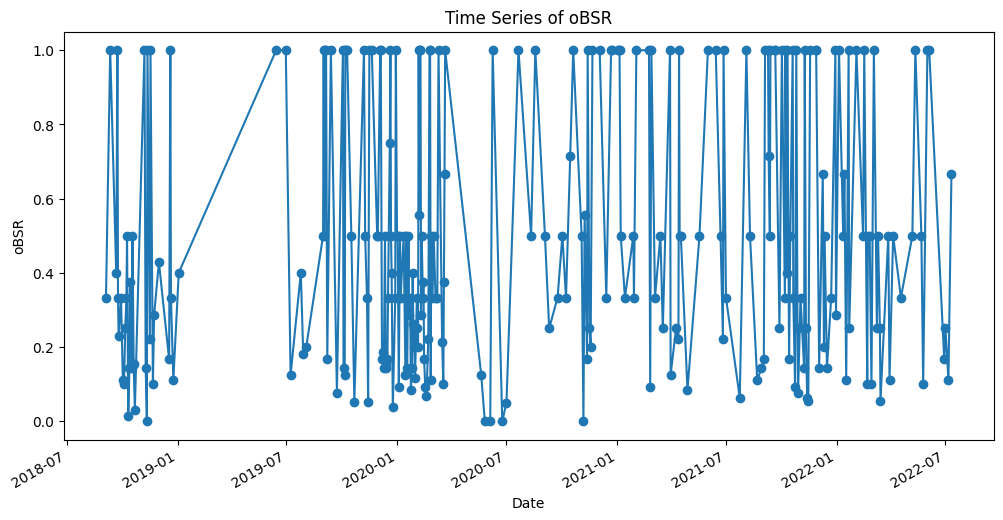

In [101]:

# 10. oBSR (Overall Booking to Search Ratio) Analysis

# Step 1: Add a Booking Flag
# Create a new column 'booking_flag' where 1 indicates a booking exists, and 0 indicates no booking.
sessions_data['booking_flag'] = sessions_data['booking_id'].notnull().astype(int)

print("# Step 1: Added 'booking_flag' column")
print(sessions_data[['session_starting_time', 'booking_id', 'booking_flag']].head(10))  # Display the first few rows
print("-" * 50)

# Step 2: Group by Date and Aggregate Metrics
# Group the data by date (extracted from 'session_starting_time') to calculate:
# - Total searches (`count` of search_id).
# - Total bookings (`sum` of booking_flag).
obsr_data = sessions_data.groupby(sessions_data['session_starting_time'].str[:10]).agg(
    total_searches=('search_id', 'count'),
    total_bookings=('booking_flag', 'sum')
)

print("# Step 2: Aggregated data by date")
print(obsr_data.head())  # Display the first few rows of aggregated data
print("-" * 50)

# Step 3: Calculate oBSR (Overall Booking to Search Ratio)
# oBSR is the ratio of total bookings to total searches for each date.
obsr_data['oBSR'] = obsr_data['total_bookings'] / obsr_data['total_searches']

print("# Step 3: Calculated oBSR")
print(obsr_data.head())  # Display the first few rows with oBSR
print("-" * 50)

# Step 4: Add Temporal Information
# Convert the index to datetime format and extract month and day of the week.
obsr_data.index = pd.to_datetime(obsr_data.index)
obsr_data['month'] = obsr_data.index.month_name()
obsr_data['day_of_week'] = obsr_data.index.day_name()

print("# Step 4: Added month and day of the week")
print(obsr_data[['month', 'day_of_week', 'oBSR']].head())  # Display the first few rows with temporal information
print("-" * 50)

# Step 5: Calculate Average oBSR by Month and Day of the Week
# Group by month and day of the week to calculate the average oBSR.
avg_obsr_by_month = obsr_data.groupby('month')['oBSR'].mean()
avg_obsr_by_day = obsr_data.groupby('day_of_week')['oBSR'].mean()

print("# Step 5: Average oBSR by Month")
print(avg_obsr_by_month)
print("-" * 50)

print("# Step 5: Average oBSR by Day of the Week")
print(avg_obsr_by_day)
print("-" * 50)

# Step 6: Plot oBSR Time Series
# Plot the oBSR values over time to visualize trends.
obsr_data['oBSR'].plot(figsize=(12, 6), title="Time Series of oBSR", marker='o')
plt.xlabel("Date")
plt.ylabel("oBSR")
plt.show()






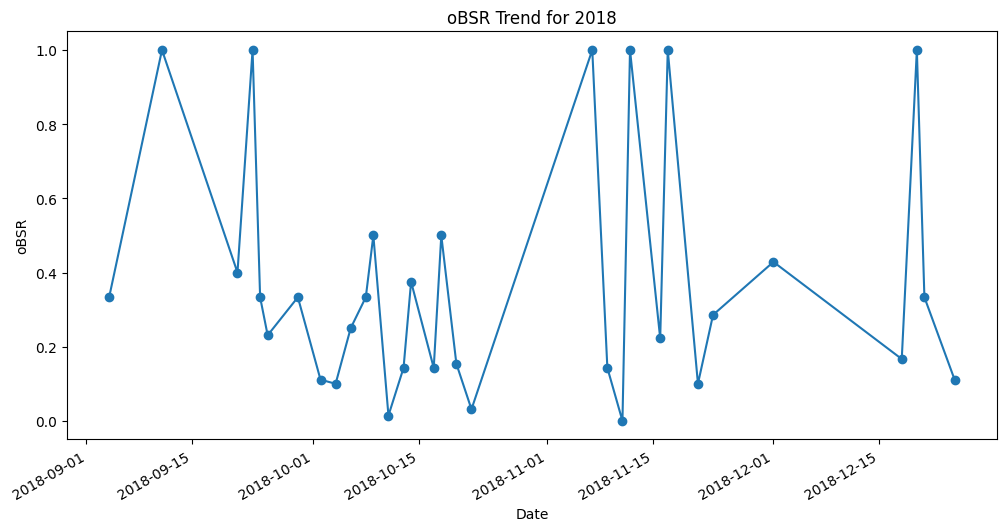

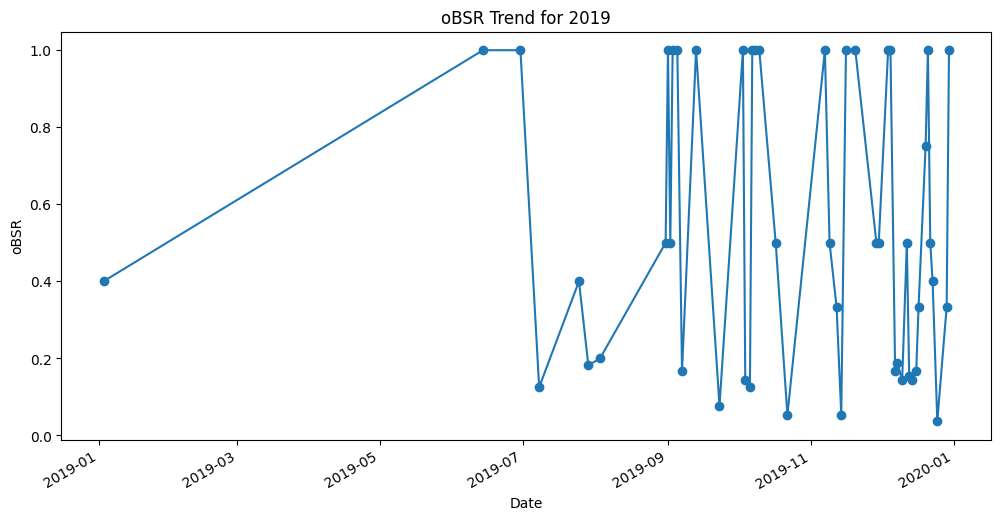

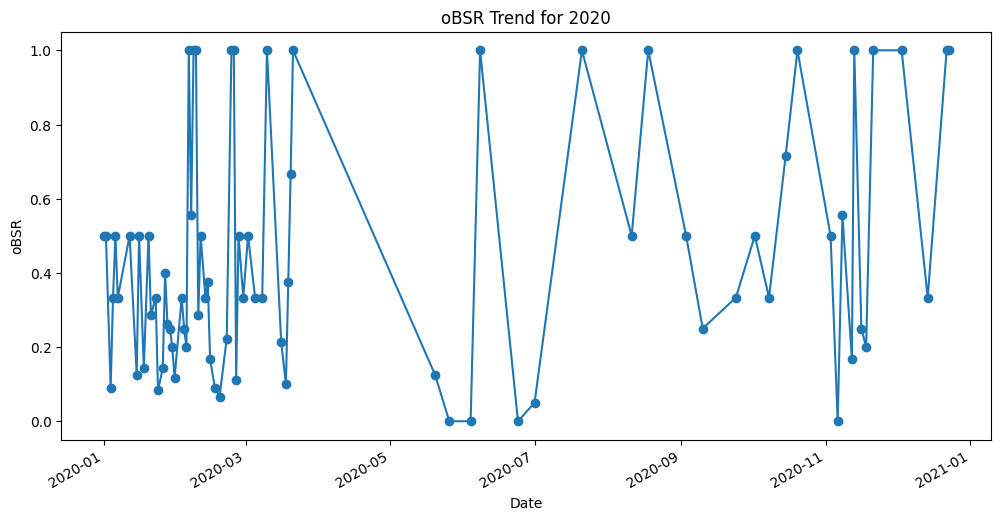

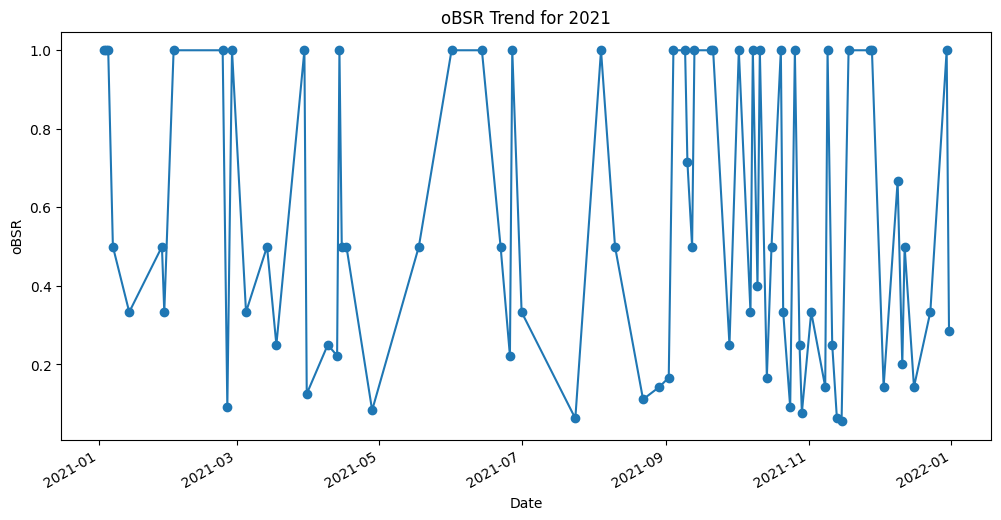

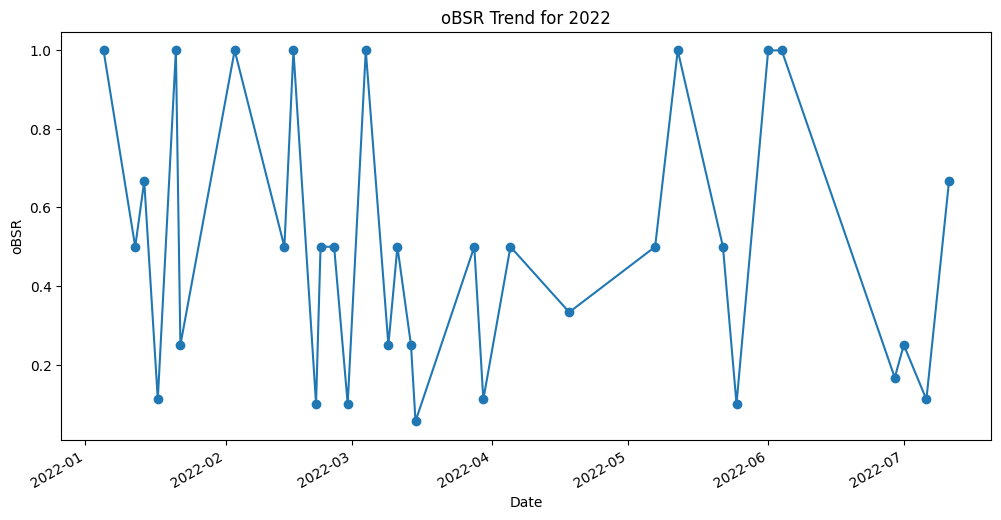

In [102]:
#  Yearly oBSR Plots

# Step 1: Add Year Column
# Extract the year from the index to facilitate yearly grouping.
obsr_data['year'] = obsr_data.index.year

# Step 2: Group and Plot oBSR for Each Year
# Iterate through the unique years and create separate plots for each.
unique_years = obsr_data['year'].unique()
for year in unique_years:
    yearly_data = obsr_data[obsr_data['year'] == year]
    
    # Plot the oBSR for the current year
    plt.figure(figsize=(12, 6))
    yearly_data['oBSR'].plot(marker='o', title=f"oBSR Trend for {year}")
    plt.xlabel("Date")
    plt.ylabel("oBSR")
    plt.show()
